# Lab Assignment 1: Neural Network from Scratch  

**Name:** Parimal Ahire  
**PRN:** 202301040067  
**Course:** Deep Learning Lab  
**GitHub Repository:** https://github.com/ParimalAhire/Lab-Assignment-1-Neural-Network



## Aim  
To implement a feedforward neural network from scratch using forward pass, backpropagation, and gradient descent, and to display updated weights at each epoch. The trained network is then tested using user input.



## Algorithm Used  
Feedforward Neural Network trained using Backpropagation and Gradient Descent.


## Step 1: Import Required Libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


## Step 2: Define Activation Functions

In [ ]:

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)


## Step 3: Define Training Data

In [ ]:

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0,0,0,1,1],
              [1,0,1,1,0],
              [1,0,1,1,0],
              [0,1,1,0,0]])


## Step 4: Network Configuration

In [ ]:

input_neurons = 2
hidden_neurons = 5
output_neurons = 5
learning_rate = 0.5
epochs = 1000


## Step 5: Initialize Weights and Biases

In [ ]:

W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

print("Initial W1:", W1)
print("Initial W2:", W2)


Initial W1: [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]]
Initial W2: [[-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]
 [ 0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491]]


## Step 6: Training the Neural Network

In [ ]:

losses = []

for epoch in range(epochs):

    # Forward Pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss Calculation
    loss = np.mean((a2 - y) ** 2)
    losses.append(loss)

    # Backpropagation
    d_output = (a2 - y) * sigmoid_derivative(a2)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)

    # Gradients
    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Weight Update (Gradient Descent)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    print(f"Epoch {epoch+1} Loss: {loss}")
    print("Updated W1:", W1)
    print("Updated W2:", W2)


Streaming output truncated to the last 5000 lines.
 [-0.73030548 -2.68969971 -0.96253427  1.98971484  1.00094569]
 [-3.03120694  3.95216234  1.23628892 -2.22535987 -0.03434627]]
Epoch 405 Loss: 0.007261440278801984
Updated W1: [[ 3.32124087  1.75107246  5.2244029  -1.10317915  2.87401223]
 [ 2.63540457  2.57890086  4.88633184 -1.83936363  2.75235298]]
Updated W2: [[-2.89270342  2.52631628  2.10640018 -3.72339751 -3.15676798]
 [-1.34716109  0.57325547  2.3802997  -1.57779207 -2.92872866]
 [ 5.83282102  0.2132074   3.76372412 -0.65581638 -3.5758587 ]
 [-0.7315726  -2.69108225 -0.96393854  1.99114845  1.00225546]
 [-3.03480944  3.95389213  1.23695176 -2.22717811 -0.03498925]]
Epoch 406 Loss: 0.007225975236699292
Updated W1: [[ 3.32242947  1.75246464  5.22743155 -1.10529967  2.87582293]
 [ 2.63741715  2.57895987  4.88925718 -1.83970273  2.75442116]]
Updated W2: [[-2.89614031  2.52811053  2.1072101  -3.72527726 -3.15755683]
 [-1.34829173  0.57410642  2.38147957 -1.57871668 -2.92986816]
 [ 5

## Step 7: Final Predictions on Training Data

In [ ]:
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
predictions = sigmoid(z2)

print("Final Predictions:", np.round(predictions, 2))


Final Predictions: [[0.07 0.   0.05 1.   0.95]
 [0.94 0.03 0.97 0.97 0.03]
 [0.94 0.03 0.96 0.97 0.04]
 [0.06 0.96 1.   0.04 0.  ]]


## Step 8: Loss Visualization

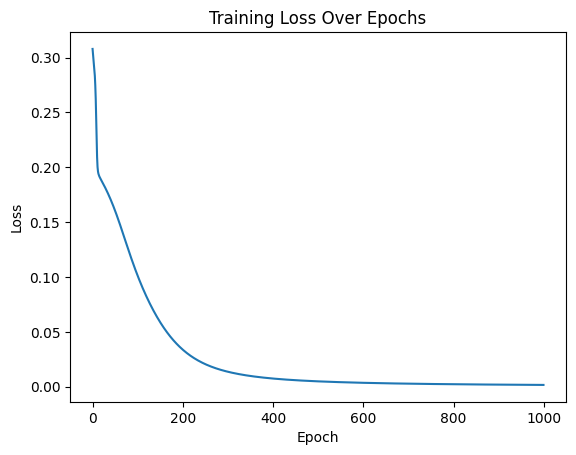

In [ ]:

plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## Step 9: Test the Network with User Input

In [ ]:
a = float(input("Enter first input (0 or 1): "))
b = float(input("Enter second input (0 or 1): "))

test_input = np.array([[a, b]])

# Forward pass for user input
z1_test = np.dot(test_input, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
output_test = sigmoid(z2_test)

# Gate labels
gate_names = ["XOR", "AND", "OR", "NAND", "NOR"]

print("\nNetwork Output (Gate-wise):")
for i, gate in enumerate(gate_names):
    print(f"{gate}: {round(output_test[0][i], 2)}")

Enter first input (0 or 1): 1
Enter second input (0 or 1): 0

Network Output (Gate-wise):
XOR: 0.94
AND: 0.03
OR: 0.96
NAND: 0.97
NOR: 0.04


## Applications  
Neural networks are widely used in real-world applications because of their ability to model complex patterns and relationships in data.

- **Image recognition** – Used in facial recognition, object detection, and medical image analysis.  
- **Speech processing** – Converts spoken language into text in virtual assistants and voice-controlled systems.  
- **Fraud detection** – Identifies suspicious financial transactions and cyber threats.  
- **Medical diagnosis** – Assists in disease prediction and analysis of patient data.  
- **Recommendation systems** – Suggests products, movies, and content based on user behavior.  
- **Autonomous systems** – Used in self-driving cars for object detection and decision-making.


## Conclusion  
The neural network was successfully implemented from scratch using forward pass, backpropagation, and gradient descent. The model learned multiple logical functions simultaneously, showing how hidden layers help solve non-linear problems. The loss decreased over epochs, demonstrating effective learning. Printing weight updates in each epoch provided a clear view of how the network improves over time. This experiment helped in understanding the core principles of neural network training, which are fundamental to modern artificial intelligence.
